# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of ridge and lasso regression!

## Objectives

In this lab you will: 

- Use lasso and ridge regression with scikit-learn 
- Compare and contrast lasso, ridge and non-regularized regression 

## Housing Prices Data

We'll use this version of the Ames Housing dataset: 

In [ ]:
# Run this cell without changes
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

In [1]:
# __SOLUTION__
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

More information about the features is available in the `data_description.txt` file in this repository.

## Data Preparation

The code below:

* Separates the data into `X` (predictor) and `y` (target) variables
* Splits the data into 75-25 training-test sets, with a `random_state` of 10
* Separates each of the `X` values into continuous vs. categorical features
* Fills in missing values (using different strategies for continuous vs. categorical features)
* Scales continuous features to a range of 0 to 1
* Dummy encodes categorical features
* Combines the preprocessed continuous and categorical features back together

In [ ]:
# Run this cell without changes
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

In [2]:
# __SOLUTION__
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

## Linear Regression Model

Let's use this data to build a first naive linear regression model. Fit the model on the training data (`X_train_preprocessed`), then compute the R-Squared and the MSE for both the training and test sets.

In [ ]:
# Replace None with appropriate code
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = None

# Print R2 and MSE for training and test sets
None

In [3]:
# __SOLUTION__ 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train_preprocessed, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg.score(X_train_preprocessed, y_train))
print('Test r^2:    ', linreg.score(X_test_preprocessed, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train_preprocessed)))
print('Test MSE:    ', mean_squared_error(y_test, linreg.predict(X_test_preprocessed)))

Training r^2: 0.9358295046768584
Test r^2:     -1.9852963138198408e+18
Training MSE: 403056136.1577625
Test MSE:     1.2666557979109703e+28


Notice the severe overfitting above; our training R-Squared is very high, but the test R-Squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso Regression

Use all the data (scaled features and dummy categorical variables, `X_train_preprocessed`) to build some models with regularization - two each for lasso and ridge regression. Each time, look at R-Squared and MSE.

Remember that you can use the scikit-learn documentation if you don't remember how to import or use these classes:

* [`Lasso` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [`Ridge` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Lasso

#### With default hyperparameters (`alpha` = 1)

In [ ]:
# Your code here

In [4]:
# __SOLUTION__ 
from sklearn.linear_model import Lasso

lasso = Lasso() # Lasso is also known as the L1 norm 
lasso.fit(X_train_preprocessed, y_train)

print('Training r^2:', lasso.score(X_train_preprocessed, y_train))
print('Test r^2:    ', lasso.score(X_test_preprocessed, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_preprocessed)))
print('Test MSE:    ', mean_squared_error(y_test, lasso.predict(X_test_preprocessed)))

Training r^2: 0.9357678834535463
Test r^2:     0.8896008328382145
Training MSE: 403443180.2665612
Test MSE:     704367122.4118733


#### With a higher regularization hyperparameter (`alpha` = 10)

In [ ]:
# Your code here

In [5]:
# __SOLUTION__ 

lasso_10 = Lasso(alpha=10)
lasso_10.fit(X_train_preprocessed, y_train)

print('Training r^2:', lasso_10.score(X_train_preprocessed, y_train))
print('Test r^2:    ', lasso_10.score(X_test_preprocessed, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso_10.predict(X_train_preprocessed)))
print('Test MSE:    ', mean_squared_error(y_test, lasso_10.predict(X_test_preprocessed)))

Training r^2: 0.9340227309628953
Test r^2:     0.8980974278412501
Training MSE: 414404517.19166696
Test MSE:     650157273.4932035


## Ridge

#### With default hyperparameters (`alpha` = 1)

In [ ]:
# Your code here

In [6]:
# __SOLUTION__ 
from sklearn.linear_model import Ridge

ridge = Ridge() # Ridge is also known as the L2 norm
ridge.fit(X_train_preprocessed, y_train)

print('Training r^2:', ridge.score(X_train_preprocessed, y_train))
print('Test r^2:    ', ridge.score(X_test_preprocessed, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_preprocessed)))
print('Test MSE:    ', mean_squared_error(y_test, ridge.predict(X_test_preprocessed)))

Training r^2: 0.920774565101128
Test r^2:     0.8864445930581225
Training MSE: 497616506.07428116
Test MSE:     724504516.4584


#### With higher regularization hyperparameter (`alpha` = 10)

In [ ]:
# Your code here

In [7]:
# __SOLUTION__ 

ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train_preprocessed, y_train)

print('Training r^2:', ridge_10.score(X_train_preprocessed, y_train))
print('Test r^2:    ', ridge_10.score(X_test_preprocessed, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge_10.predict(X_train_preprocessed)))
print('Test MSE:    ', mean_squared_error(y_test, ridge_10.predict(X_test_preprocessed)))

Training r^2: 0.8889479144938476
Test r^2:     0.879515956494524
Training MSE: 697520320.9975778
Test MSE:     768710500.2896702


## Comparing the Metrics    

Which model seems best, based on the metrics?

In [ ]:
# Write your conclusions here:


In [8]:
# __SOLUTION__
print('Test r^2')
print('Linear Regression:', linreg.score(X_test_preprocessed, y_test))
print('Lasso, alpha=1:   ', lasso.score(X_test_preprocessed, y_test))
print('Lasso, alpha=10:  ', lasso_10.score(X_test_preprocessed, y_test))
print('Ridge, alpha=1:   ', ridge.score(X_test_preprocessed, y_test))
print('Ridge, alpha=10:  ', ridge_10.score(X_test_preprocessed, y_test))
print()
print('Test MSE')
print('Linear Regression:', mean_squared_error(y_test, linreg.predict(X_test_preprocessed)))
print('Lasso, alpha=1:   ', mean_squared_error(y_test, lasso.predict(X_test_preprocessed)))
print('Lasso, alpha=10:  ', mean_squared_error(y_test, lasso_10.predict(X_test_preprocessed)))
print('Ridge, alpha=1:   ', mean_squared_error(y_test, ridge.predict(X_test_preprocessed)))
print('Ridge, alpha=10:  ', mean_squared_error(y_test, ridge_10.predict(X_test_preprocessed)))

Test r^2
Linear Regression: -1.9852963138198408e+18
Lasso, alpha=1:    0.8896008328382145
Lasso, alpha=10:   0.8980974278412501
Ridge, alpha=1:    0.8864445930581225
Ridge, alpha=10:   0.879515956494524

Test MSE
Linear Regression: 1.2666557979109703e+28
Lasso, alpha=1:    704367122.4118733
Lasso, alpha=10:   650157273.4932035
Ridge, alpha=1:    724504516.4584
Ridge, alpha=10:   768710500.2896702


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

In terms of both R-Squared and MSE, the `Lasso` model with `alpha`=10 has the best metric results.

(Remember that better R-Squared is higher, whereas better MSE is lower.)

</details>

## Comparing the Parameters

Compare the number of parameter estimates that are (very close to) 0 for the `Ridge` and `Lasso` models with `alpha`=10.

Use 10**(-10) as an estimate that is very close to 0. 

In [ ]:
# Number of Ridge params almost zero


In [9]:
# __SOLUTION__ 
print('Zeroed-out ridge params:', sum(abs(ridge_10.coef_) < 10**(-10)),
     'out of', len(ridge_10.coef_))

Zeroed-out ridge params: 0 out of 294


In [ ]:
# Number of Lasso params almost zero


In [10]:
# __SOLUTION__ 
print('Zeroed-out lasso params:', sum(abs(lasso_10.coef_) < 10**(-10)),
     'out of', len(lasso_10.coef_))

Zeroed-out lasso params: 81 out of 294


In [ ]:
# Compare and interpret these results


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The ridge model did not penalize any coefficients to 0, while the lasso model removed about 1/4 of the coefficients. The lasso model essentially performed variable selection for us, and got the best metrics as a result!

</details>

## Finding an Optimal Alpha

Earlier we tested two values of `alpha` to see how it affected our MSE and the value of our coefficients. We could continue to guess values of `alpha` for our ridge or lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [ ]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Optimal Alpha Value: 28


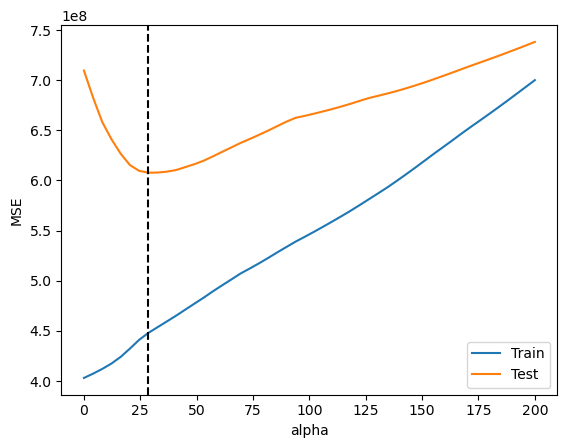

In [11]:
# __SOLUTION__
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against `alpha`. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what `alpha` represents and how it relates to overfitting vs underfitting.

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

For `alpha` values below 28, the model is overfitting. As `alpha` increases up to 28, the MSE for the training data increases and MSE for the test data decreases, indicating that we are reducing overfitting.

For `alpha` values above 28, the model is starting to underfit. You can tell because _both_ the train and the test MSE values are increasing.

</details>

## Summary

Well done! You now know how to build lasso and ridge regression models, use them for feature selection and find an optimal value for `alpha`. 